# looking at covid and dental practices


In [1]:
#load any potentially useful libraries
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import re


## Describing the data

In [2]:
#get information about the dataset
df = pd.read_csv('nation_2021-12-13.csv')
print(df.head())
print('\n Description: \n', df.describe())
print('\n Info: \n', df.info)
print('\n Totals: \n', df.count())
print('\n Data Shape: \n', df.shape)
print('\n NaN values: \n', df.isna().sum())

dfadmissdate = df[['date', 'newAdmissions']].dropna(subset=['newAdmissions'])
print('\n Date-range for new admissions: \n', dfadmissdate.iloc[[0,-1]])

dfcasesbypublishdate = df[['date', 'newCasesByPublishDate']].dropna(subset=['newCasesByPublishDate'])
print('\n Date-range for new cases by publish date: \n', dfcasesbypublishdate.iloc[[0,-1]])

dfseconddose = df[['date', 'newPeopleVaccinatedSecondDoseByPublishDate']].dropna(subset=['newPeopleVaccinatedSecondDoseByPublishDate'])
print('\n Date-range for new people vaccinated second dose: ', dfseconddose.iloc[[0,-1]])

dftests = df[['date', 'newTestsByPublishDate']].dropna(subset=['newTestsByPublishDate'])
print('\n Date-range for new tests by publish date: \n', dftests.iloc[[0,-1]])

    areaCode areaName areaType        date  newAdmissions  \
0  E92000001  England   nation  2021-12-13            NaN   
1  E92000001  England   nation  2021-12-12            NaN   
2  E92000001  England   nation  2021-12-11          696.0   
3  E92000001  England   nation  2021-12-10          707.0   
4  E92000001  England   nation  2021-12-09          799.0   

   newCasesByPublishDate  newPeopleVaccinatedSecondDoseByPublishDate  \
0                  44931                                         NaN   
1                  40713                                     24900.0   
2                  48540                                     34061.0   
3                  48908                                     28294.0   
4                  43550                                     29840.0   

   newTestsByPublishDate  
0                    NaN  
1              1140279.0  
2               927390.0  
3              1082643.0  
4              1190280.0  

 Description: 
        newAdmissions 

The code above shows the mean, standard deviation, quartiles and minimum and maximum values for each variable.

The dataframe holds a total of 683 rows, with each row representing one day of recorded statistics. However, each variable is recorded from a different date, with the second doses starting as they were half way through the pandemic. This means that each variable has its own total number of observations depending on the date it had been recorded from. All variables ended on the same date.

The code above gives the date-range, total observations and missing values for each variable. As seen above, new admissions has 633 total observations (and 50 NaN) and a date range of 2020-03-19 to 2021-12-11. New cases has 683 observations (0 NaN) and a date range of 2020-01-31 to 2021-12-13. People vaccinated with second dose has 336 observations (and 347 NaN) and a date range of 2021-01-11 to 2021-12-12. Finally, new tests has 518 observations (and 165 NaN) and a date range of 2020-07-13 to 2021-12-12. The code for the date-range has excluded NaN values for variables.

## Plotting COVID data

Text(0, 0.5, 'Frequency')

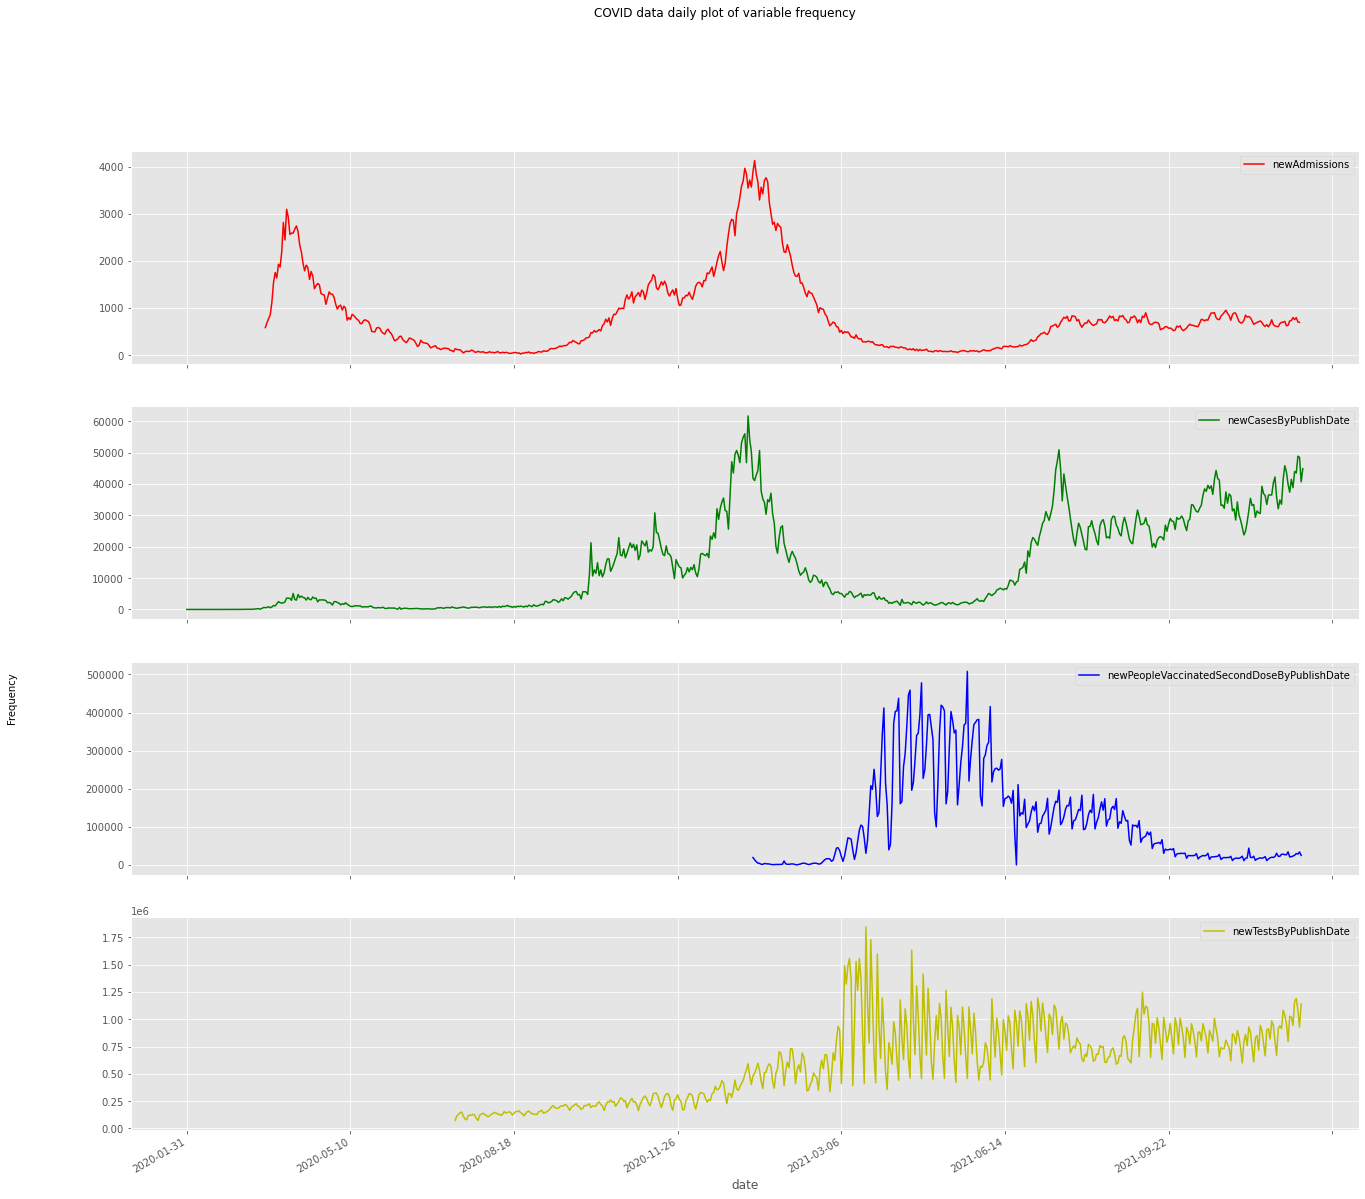

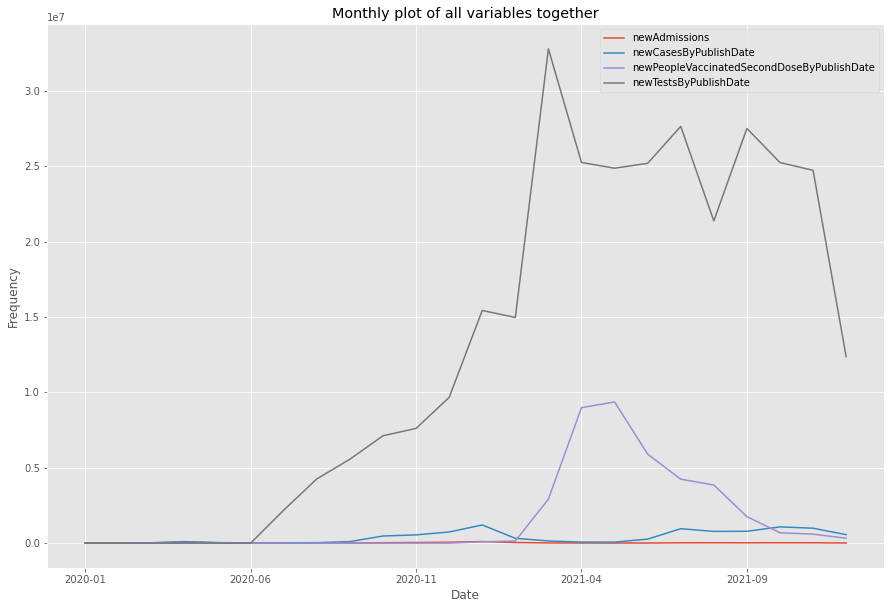

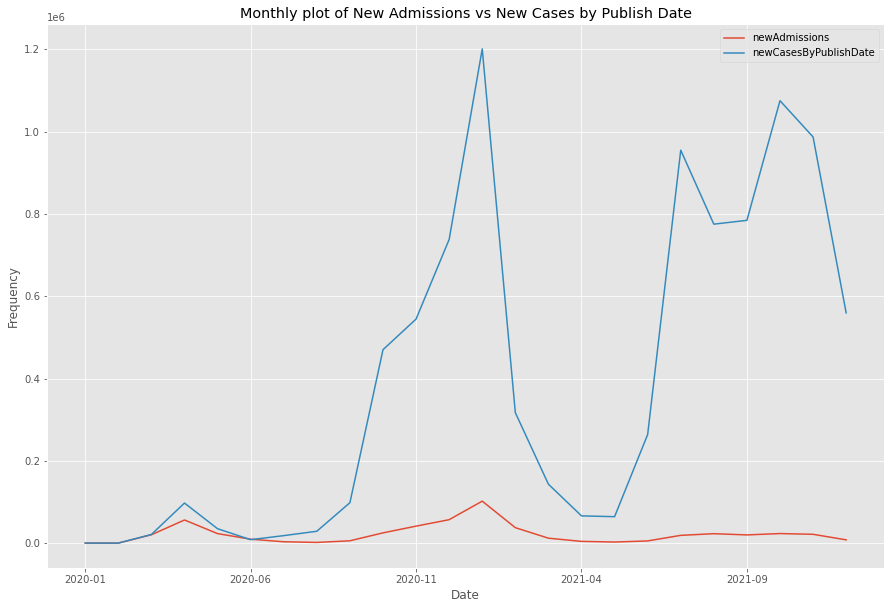

In [3]:
#create a daily plot
matplotlib.style.use('ggplot')
df.sort_values(by=['date'],inplace=True)
ax = df.plot(x='date',kind='line', subplots=True, grid=True,
        layout=(4,1), sharex=True, sharey=False, legend=True,
        style=['r','g','b','y'],figsize=(22,20),title='COVID data daily plot of variable frequency')
fig=ax[0,0].figure

#adding a shared label to the y-axis 
fig.text(0.05,0.5, "Frequency", ha="center", va="center", rotation=90)


#setting a style for the plots - this one has a grey tone
matplotlib.style.use('ggplot')

#creating a monthly plot
#making a dataframe with the desired date format 
dfs=df.copy()
monthly = pd.to_datetime(dfs['date']).dt.strftime('%Y-%m')
dfs['date'] = monthly
dfs=dfs.groupby('date').sum()
dfs.reset_index(level=0,inplace=True)

#plotted together
ax2 = dfs.plot(x='date',figsize=(15,10),title='Monthly plot of all variables together')
ax2.set_xlabel('Date')
ax2.set_ylabel('Frequency')

#plotting the two hard to determine variables on their own
ax3 = dfs[['date','newAdmissions','newCasesByPublishDate']].plot(title='Monthly plot of New Admissions vs New Cases by Publish Date',
                                                                 x='date',figsize=(15,10))
ax3.set_xlabel('Date')
ax3.set_ylabel('Frequency')

The graphics above display each variable as sub-plots (as a daily graph would be too condensed to visualize on one plot, which was the main limitation) as well as on one plot which has the total frequencies displayed in a monthly manner and enhanced below that to differentiate two hard-to-see variables. 

From these plots the following general analysis can be made:

From the daily plot, as the monthly data is not resolute enough to distinguish between the April admission and may case peaks - 
There was an early and high initial peak of hospital admissions in April 2020 before testing was widespread (hence why cases did not follow the same trend) which fell in tandem with the first national lockdown having been in effect for multiple weeks and another large double-peak climaxing in winter 2020 (which was mirrored by cases as tests had picked up by this time). This peak was controlled by another lockdown, and hospital admissions, while cases increased and peaked again in summer-autumn 2021 to 50000 a day or 1.2 million monthly by the end of January 2021, stayed low due to the growing number of second doses administered by that time which help to reduce the chances of hospitalisation and severe symptoms in those infected.



## Function to view R rate 

,areaCode,areaName,areaType,date,transmissionRateMax,transmissionRateMin
36,E40000005,South East,nhsRegion,2020-06-12,1.0,0.8
35,E40000005,South East,nhsRegion,2020-06-19,0.9,0.7
34,E40000005,South East,nhsRegion,2020-06-25,0.9,0.7
33,E40000005,South East,nhsRegion,2020-07-03,1.0,0.7
32,E40000005,South East,nhsRegion,2020-07-10,1.0,0.8
31,E40000005,South East,nhsRegion,2020-07-17,1.0,0.8
30,E40000005,South East,nhsRegion,2020-07-24,1.0,0.8
29,E40000005,South East,nhsRegion,2020-07-31,1.0,0.8
28,E40000005,South East,nhsRegion,2020-08-07,1.0,0.8
27,E40000005,South East,nhsRegion,2020-08-14,0.9,0.8


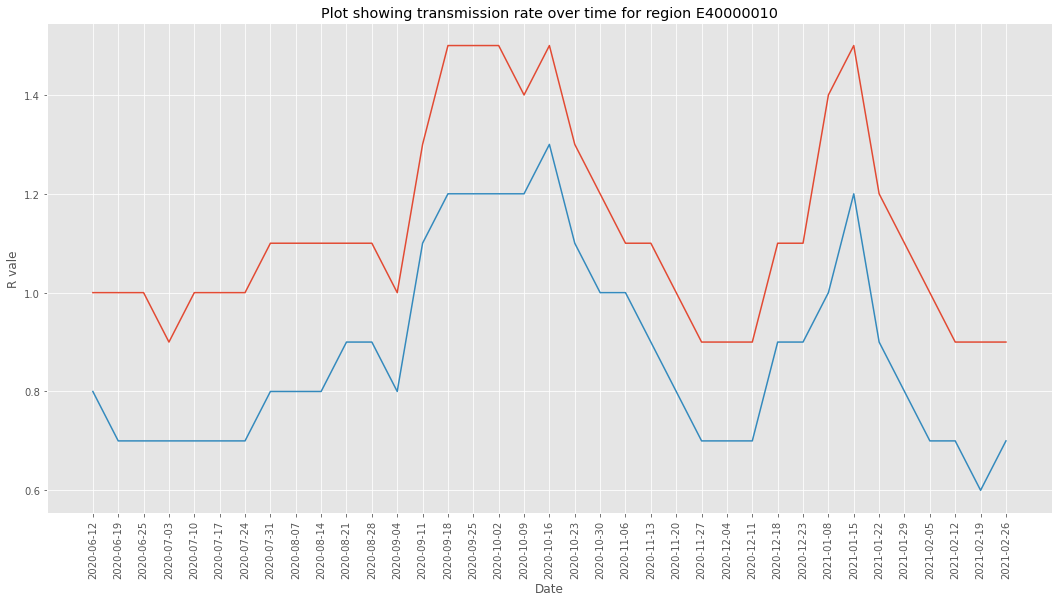

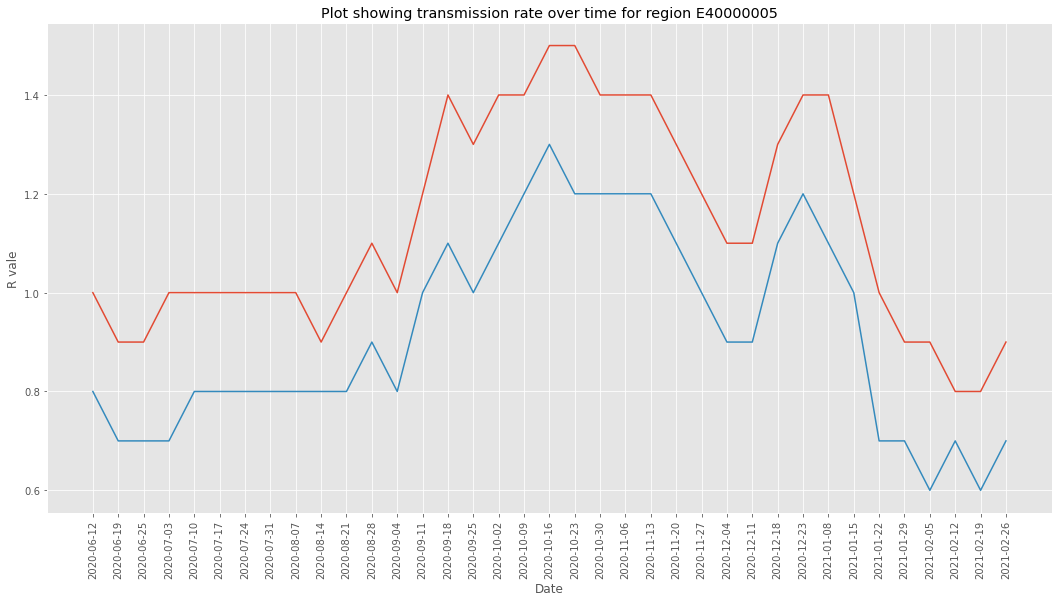

In [4]:
#create function to compare R rates of two regions taking data from URL and plotting
#defining the function and providing it with the url - this method uses an f string in order to insert the desired 
#practice code and dates

def myfunction(code, date):
    url = f'https://api.coronavirus.data.gov.uk/v2/data?areaType=nhsRegion&areaCode={code}&metric=transmissionRateMax&metric=transmissionRateMin&format=csv&release={date}'
    try:
        imported=pd.read_csv(url)
        imported.sort_values(by=['date'], inplace=True)
#line for maximum rate and setting a title and figure size as well as axis labels    
        plt.figure(figsize=(18,9)) 
        plt.plot(imported['date'],imported['transmissionRateMax'])
        plt.xlabel('Date')
        plt.ylabel('R vale')
        plt.title(f'Plot showing transmission rate over time for region {code}')
        matplotlib.style.use('ggplot')
# line for minimum rate and setting the xticks labels to a readable 90 degrees       
        plt.plot(imported['date'],imported['transmissionRateMin'])
        plt.xticks(rotation=90)
        plt.xlabel('Date')
        plt.ylabel('R vale')
        matplotlib.style.use('ggplot')
        
               
        return imported
#if the function cannot return a plot then the following erorr will show 
    except: 
        return 'Not a valid NHS code or the date is out of the range. Please use the format A00000000 and YYYY-MM-DD. This error means that the dataframe comes back as empty and is therefore not a used URL.'

#running the function with the desired regions and date
myfunction('E40000010','2021-02-26')
myfunction('E40000005','2021-02-26')

From inputs to the function above, the R rates between the South East and North West of England can be compared. The graphs show that both regions follow the same pattern generally for both maximum and minimum R rates weekly, however it appears to be the case that the R rates declined more steeply in the North West. For example, the Autumn 2020 lockdown period had caused a maximum R rate drop from 1.4 to 1.15 in the South East. During this same downtrend, the maximum R rate in the North West fell from 1.45 to 0.9. The minimum R rates also fell to 0.7 in the North West compared to 0.9 in the South East. Also, the minimum R rate stayed  down at 0.7 for three months longer during the initial phase of the graph in the North West, however the maximum R rate was delayed and more brief in this initial drop when compared to the South East

R rate peaks seem to also be longer prolonged in the South East. It should be however observed that the maximum R rate fell to 0.8 in February 2021 in the South East compared to it stabilising at 0.9 in the North West. This plot may be improved with a vertical line between peaks and troughs.

## 6 most visited London dental practices for children

     PSEEN_END_DATE GEOG_TYPE PRACTICE_CODE  PRACTICE_NAME PRAC_POSTCODE  \
5675     2021-01-31  Practice        V00003  MISS KM BOLES      RH11 7HL   
5676     2021-01-31  Practice        V00003  MISS KM BOLES      RH11 7HL   
5677     2021-01-31  Practice        V00003  MISS KM BOLES      RH11 7HL   

     CCG_CODE CCG_ONS_CODE             CCG_NAME    LA_CODE  \
5675      70F    E38000248  NHS West Sussex CCG  E10000032   
5676      70F    E38000248  NHS West Sussex CCG  E10000032   
5677      70F    E38000248  NHS West Sussex CCG  E10000032   

                         LA_NAME REGION_CODE REGION_ONS_CODE REGION_NAME  \
5675  West Sussex County Council         Y59       E40000005  South East   
5676  West Sussex County Council         Y59       E40000005  South East   
5677  West Sussex County Council         Y59       E40000005  South East   

     PATIENT_TYPE AGE_BAND  PATIENTS_SEEN  POPULATION  
5675        Child        1              4         NaN  
5676        Child       10   

(4000.0, 10000.0)

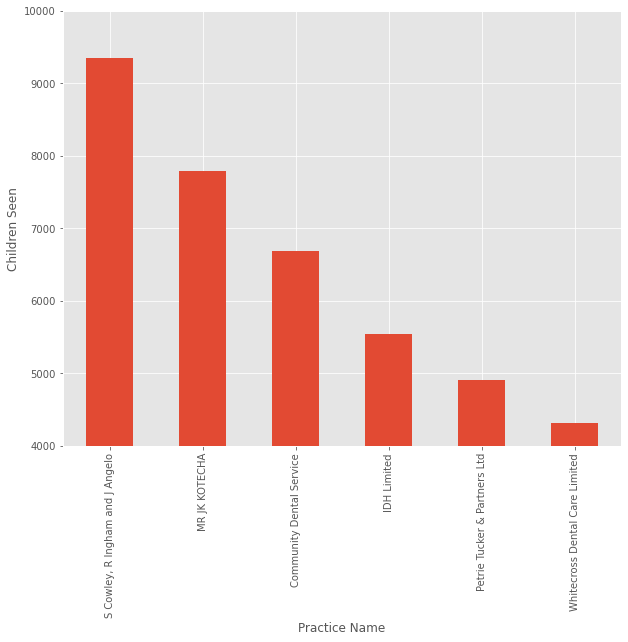

In [5]:
#find the top six london practices for children
#read the csv to a pandas dataframe
df2 = pd.read_csv('./dental/nhs-dent-stat-eng-jan-jun-21-anx3-ps-prac.csv')
print(df2.dropna(subset=['PRACTICE_CODE']).head(3))

#isolate required columns as a new df
londonchild = df2[['REGION_NAME',
                   'PATIENT_TYPE',
                   'PSEEN_END_DATE',
                   'PATIENTS_SEEN',
                   'PRACTICE_NAME']][(df2['REGION_NAME']=='London') & (df2['PATIENT_TYPE']=='Child') & (df2['PSEEN_END_DATE']=='2021-06-30')]
#group by practice name and their total patients seen, show the top six results
plot1 = londonchild.groupby('PRACTICE_NAME')['PATIENTS_SEEN'].sum().sort_values(ascending=False).head(6).dropna()
#visualise this result
ax9=plot1.plot(kind='bar',figsize=(10,8))
plt.xlabel('Practice Name')
plt.ylabel('Children Seen')

#cutting out unneeded bottom 4000 of y-axis
ax9.set_ylim(4000,10000)





The figure above shows the top six most visited practices in London by children and how many children were seen by these practices as a bar chart. It would also be interesting to next have a look at multiple different variables using a bubble chart.

## Children and adults by region

In [6]:
#creating a table showing total practices, children and adults per region 

#create a new dataframe from the read file to only show the desired date and drop any NaN practice codes
#proceed to create a dataframe from this with only children as patient type and group these into regions and count
#their totals
dfjun = df2[(df2['PSEEN_END_DATE']=='2021-06-30')].dropna(subset=['PRACTICE_CODE'])
child_region = dfjun[(df2['PATIENT_TYPE'] == 'Child')].groupby(['REGION_NAME'])['PATIENTS_SEEN'].sum()

#find number of practices
practice_region = dfjun.groupby(['REGION_NAME'])['PRACTICE_CODE'].nunique()

#calculate average child per region
average_child_region = child_region/practice_region

#repeat this for adults, join together both dfs and show a table with the results
adult_region = dfjun[(df2['PATIENT_TYPE'] == 'Adult')].groupby(['REGION_NAME'])['PATIENTS_SEEN'].sum()
average_adult_region = adult_region/practice_region
table = pd.concat([practice_region,average_adult_region,average_child_region],axis=1)
table.columns = ['Practices','Adults', 'Children']
# print('Table showing total number of practices per region as well as adults and children per region',table)
table



#use following hard code as proof to check answer
#children per practice per region


# east_df = df2[(df2['PSEEN_END_DATE'] == '2021-06-30') & 
#                          (df2['REGION_NAME'] == 'East of England')].dropna(subset=['PRACTICE_CODE'])
# east_children = east_df[(df2['PATIENT_TYPE'] == 'Child')].dropna(subset=['PRACTICE_CODE'])
# total_east_children = east_children['PATIENTS_SEEN'].sum()
# print('total children in east england :',total_east_children)
# total_east_practice = east_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in east :',total_east_practice)
# print('Mean number of children per practice in east :', total_east_children/total_east_practice)


# london_df = df2[(df2['PSEEN_END_DATE'] == '2021-06-30') & 
#                          (df2['REGION_NAME'] == 'London')].dropna(subset=['PRACTICE_CODE'])
# london_children = london_df[(df2['PATIENT_TYPE'] == 'Child')].dropna(subset=['PRACTICE_CODE'])
# total_london_children = london_children['PATIENTS_SEEN'].sum()
# print('total children in london :',total_london_children)
# total_london_practice = london_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in london :',total_london_practice)
# print('Mean number of children per practice in london :', total_london_children/total_london_practice)



# northeastyorkshire_df = df2[(df2['PSEEN_END_DATE'] == '2021-06-30') & 
#                          (df2['REGION_NAME'] == 'North East and Yorkshire')].dropna(subset=['PRACTICE_CODE'])
# northeastyorkshire_children = northeastyorkshire_df[(df2['PATIENT_TYPE'] == 'Child')].dropna(subset=['PRACTICE_CODE'])
# total_northeastyorkshire_children = northeastyorkshire_children['PATIENTS_SEEN'].sum()
# print('total children in northeast and yorkshire :',total_northeastyorkshire_children)
# total_northeastyorkshire_practice = northeastyorkshire_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in northeast and yorkshire :',total_northeastyorkshire_practice)
# print('Mean number of children per practice in northeast and yorkshire :', total_northeastyorkshire_children/total_northeastyorkshire_practice)



# nw_df = df2[(df2['PSEEN_END_DATE'] == '2021-06-30') & 
#                          (df2['REGION_NAME'] == 'North West')].dropna(subset=['PRACTICE_CODE'])
# nw_children = nw_df[(df2['PATIENT_TYPE'] == 'Child')].dropna(subset=['PRACTICE_CODE'])
# total_nw_children = nw_children['PATIENTS_SEEN'].sum()
# print('total children in northeast and yorkshire :',total_nw_children)
# total_nw_practice = nw_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in north west :',total_nw_practice)
# print('Mean number of children per practice in north west :', total_nw_children/total_nw_practice)


# midlands_df = df2[(df2['PSEEN_END_DATE'] == '2021-06-30') & 
#                          (df2['REGION_NAME'] == 'Midlands')].dropna(subset=['PRACTICE_CODE'])
# midlands_children = midlands_df[(df2['PATIENT_TYPE'] == 'Child')].dropna(subset=['PRACTICE_CODE'])
# total_midlands_children = midlands_children['PATIENTS_SEEN'].sum()
# print('total children in the midlands :',total_midlands_children)
# total_midlands_practice = midlands_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in the midlands :',total_northeastyorkshire_practice)
# print('Mean number of children per practice in the midlands :', total_midlands_children/total_midlands_practice)


# sw_df = df2[(df2['PSEEN_END_DATE'] == '2021-06-30') & 
#                          (df2['REGION_NAME'] == 'South West')].dropna(subset=['PRACTICE_CODE'])
# sw_children = sw_df[(df2['PATIENT_TYPE'] == 'Child')].dropna(subset=['PRACTICE_CODE'])
# total_sw_children = sw_children['PATIENTS_SEEN'].sum()
# print('total children in south west :',total_sw_children)
# total_sw_practice = sw_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in south west :',total_sw_practice)
# print('Mean number of children per practice in south west :', total_sw_children/total_sw_practice)


# se_df = df2[(df2['PSEEN_END_DATE'] == '2021-06-30') & 
#                          (df2['REGION_NAME'] == 'South East')].dropna(subset=['PRACTICE_CODE'])
# se_children = se_df[(df2['PATIENT_TYPE'] == 'Child')].dropna(subset=['PRACTICE_CODE'])
# total_se_children = se_children['PATIENTS_SEEN'].sum()
# print('total children in south east :',total_se_children)
# total_se_practice = se_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in south east :',total_se_practice)
# print('Mean number of children per practice in south east :', total_se_children/total_se_practice)


# unallocated_df = df2[(df2['PSEEN_END_DATE'] == '2021-06-30') & 
#                          (df2['REGION_NAME'] == 'Unallocated')].dropna(subset=['PRACTICE_CODE'])
# unallocated_children = unallocated_df[(df2['PATIENT_TYPE'] == 'Child')].dropna(subset=['PRACTICE_CODE'])
# total_unallocated_children = unallocated_children['PATIENTS_SEEN'].sum()
# print('total children unallocated :',total_unallocated_children)
# total_unallocated_practice = unallocated_df['PRACTICE_CODE'].nunique()
# print('Total number of practices unallocated :',total_unallocated_practice)
# print('Mean number of children unallocated :', total_unallocated_children/total_unallocated_practice)


# #adults




# london_adults = london_df[(df2['PATIENT_TYPE'] == 'Adult')].dropna(subset=['PRACTICE_CODE'])
# total_london_adults = london_adults['PATIENTS_SEEN'].sum()
# print('total adults in london :',total_london_adults)
# total_london_practice = london_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in london :',total_london_practice)
# print('Mean number of adults in london :', total_london_adults/total_london_practice)




# northeastyorkshire_adults = northeastyorkshire_df[(df2['PATIENT_TYPE'] == 'Adult')].dropna(subset=['PRACTICE_CODE'])
# total_northeastyorkshire_adults = northeastyorkshire_adults['PATIENTS_SEEN'].sum()
# print('total adults in northeast and yorkshire :',total_northeastyorkshire_adults)
# total_northeastyorkshire_practice = northeastyorkshire_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in northeastyorkshire :',total_northeastyorkshire_practice)
# print('Mean number of adults in northeastyorkshire :', total_northeastyorkshire_adults/total_northeastyorkshire_practice)


# nw_adults = nw_df[(df2['PATIENT_TYPE'] == 'Adult')].dropna(subset=['PRACTICE_CODE'])
# total_nw_adults = nw_adults['PATIENTS_SEEN'].sum()
# print('total adults in nw :',total_nw_adults)
# total_nw_practice = nw_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in nw :',total_nw_practice)
# print('Mean number of adults in nw :', total_nw_adults/total_nw_practice)


# midlands_adults = midlands_df[(df2['PATIENT_TYPE'] == 'Adult')].dropna(subset=['PRACTICE_CODE'])
# total_midlands_adults = midlands_adults['PATIENTS_SEEN'].sum()
# print('total adults in midlands :',total_midlands_adults)
# total_midlands_practice = midlands_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in midlands :',total_midlands_practice)
# print('Mean number of adults in midlands :', total_midlands_adults/total_midlands_practice)

# sw_adults = sw_df[(df2['PATIENT_TYPE'] == 'Adult')].dropna(subset=['PRACTICE_CODE'])
# total_sw_adults = sw_adults['PATIENTS_SEEN'].sum()
# print('total adults in sw :',total_sw_adults)
# total_sw_practice = sw_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in sw :',total_sw_practice)
# print('Mean number of adults in sw :', total_sw_adults/total_sw_practice)


# se_adults =se_df[(df2['PATIENT_TYPE'] == 'Adult')].dropna(subset=['PRACTICE_CODE'])
# total_se_adults = se_adults['PATIENTS_SEEN'].sum()
# print('total adults in se :',total_se_adults)
# total_se_practice = se_df['PRACTICE_CODE'].nunique()
# print('Total number of practices in se :',total_se_practice)
# print('Mean number of adults in se :', total_se_adults/total_se_practice)


# unallocated_adults = unallocated_df[(df2['PATIENT_TYPE'] == 'Adult')].dropna(subset=['PRACTICE_CODE'])
# total_unallocated_adults = unallocated_adults['PATIENTS_SEEN'].sum()
# print('total adults unallocated :',total_unallocated_adults)
# total_unallocated_practice = unallocated_df['PRACTICE_CODE'].nunique()
# print('Total number of practices unallocated :',total_unallocated_practice)
# print('Mean number of adults unallocated :', total_unallocated_adults/total_unallocated_practice)








<ipython-input-6-cf7d74e77be9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  child_region = dfjun[(df2['PATIENT_TYPE'] == 'Child')].groupby(['REGION_NAME'])['PATIENTS_SEEN'].sum()
<ipython-input-6-cf7d74e77be9>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  adult_region = dfjun[(df2['PATIENT_TYPE'] == 'Adult')].groupby(['REGION_NAME'])['PATIENTS_SEEN'].sum()


,Practices,Adults,Children
REGION_NAME,,,
East of England,759,2764.368906,600.906456
London,1191,2026.978170,487.014274
Midlands,1244,2804.704180,591.638264
North East and Yorkshire,1023,3130.687195,582.633431
North West,937,2670.045891,541.151547
South East,1206,2147.080431,556.644279
South West,667,2773.914543,579.265367
Unallocated,25,1821.680000,526.080000


The table shown above provides the total number of practices and average adults and children per practice per region. The region with the highest number of adults per practice is the North East (3131) and Yorkshire and for children is the East of England (601). The region with the lowest number of adults per practice is London (2027) and for children it is also London (487). The Midlands had the highest number of practices (1244) and the South West had the lowest number of practices (667). 
This finding indicates that London has a lower proportion of people who visit a dental practice than the Midlands, South East or North East, as it doesn't have a significantly lower population (Clark, 2021). This data could provide useful in determining which regions of the country the NHS could focus its efforts in either promoting the use of dental practices or where to found new practices - The North East and Yorkshire for adults and the East of England for children could use more practices which could reduce the burden on individual practitioners as well as wait times.

There are 25 unallocated practices without a region - these practices have the lowest average adult per practice and the second to lowest after London child per practice rate.

## Age distribution by group for practice code and date

<AxesSubplot:title={'center':'Practice name: MISS KM BOLES Total Patients: 2459\nAge-bands represented on pie as area'}, ylabel='PATIENTS_SEEN'>

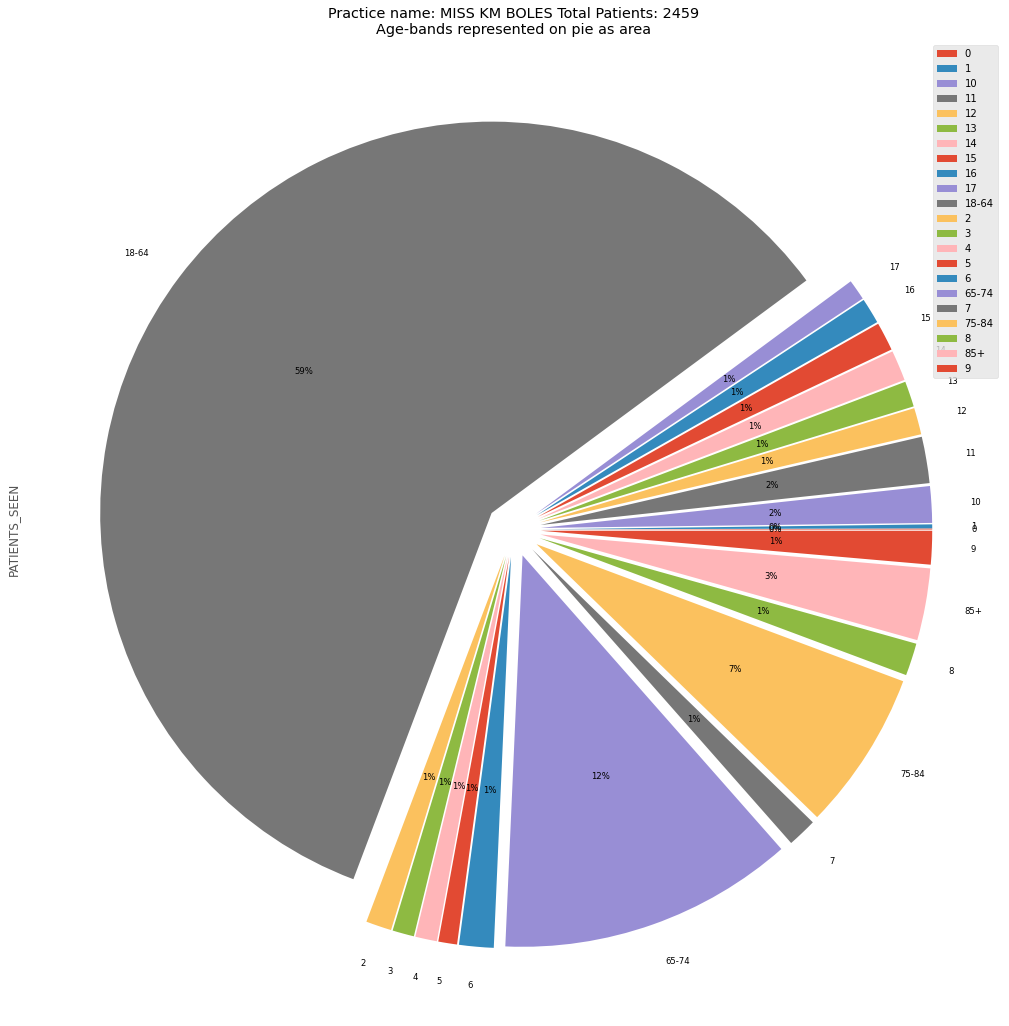

In [7]:
#creating a function that takes practice code and reporting period end date as inputs
#and provides a pie chart showing patient distribution by age group
#set a new dataframe to contain the required columns

def pie(prac_code,end_date):
#make a new dataframe showing only the values where date and code are the same as those entered into the function
#and sort them by age band
    pie_band = df2.loc[(df2['PSEEN_END_DATE']==end_date)
                     & (df2['PRACTICE_CODE']==prac_code)].sort_values('AGE_BAND')
    pie_band['AGE_BAND'] = pie_band['AGE_BAND'].astype(str)
#group this df by patients seen and enter it into a new df, though an inplace solution also exists    
    pie_data = pie_band.groupby(['AGE_BAND'])['PATIENTS_SEEN'].sum()
    
    patients_seen = pie_band['PATIENTS_SEEN'].sum()

#plot the chart   
    
    plot = pie_data.plot(kind='pie',
                         title='Practice name: ' + pie_band.loc[(pie_band['PRACTICE_CODE'] == prac_code)]['PRACTICE_NAME'].any() + ' Total Patients: ' + str(patients_seen) + '\nAge-bands represented on pie as area',
                         figsize = (18,18),autopct='%1.0f%%',fontsize=8.5,explode=(0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07))
    plt.legend(labels=pie_band['AGE_BAND'],loc="best")
    
    return(plot)

pie('V00003','2021-06-30')










As seen above, and if tested, the majority of practices and time ranges will show a similar age-distribution. 18-64 takes up the majority of the patient numbers, followed by 65-74 and 75-84. There is an extremely small number of infants under the age of two who have been seen by a dentist, though in this particular example, more two year olds than 3,4,5 or even 17 year olds were seen. One issue with this chart is that there is an instance where two age bands overlap on the labels.

## Standardising files and merging

In [9]:
#first create a list of the files
files = ['./dental/nhs-dent-stat-eng-jan-jun-20-anx3-ps-prac.csv',
            './dental/nhs-dent-stat-eng-jul-dec-20-anx3-ps-prac.csv',
            './dental/nhs-dent-stat-eng-jan-jun-21-anx3-ps-prac.csv']
#define an empty df
df3 = pd.DataFrame()
#the following loop will read a csv and ensure that it has the correct date format and column name and add to the df
#then it will do the same for the next two files in the list
for file in files:
    file = pd.read_csv(file)
    file['PSEEN_END_DATE'] = pd.to_datetime(file['PSEEN_END_DATE'])
    if 'GEOG_TYPE' in file:
        file = file.rename(columns={'GEOG_TYPE':'GEOTYPE'})
    df3 = pd.concat([df3,file], ignore_index = True)
print('Obs: ', len(df3.index))
print('Prac N: ', df3['PRACTICE_CODE'].nunique())


Obs:  2799177
Prac N:  7271


The total number of observations or rows is 2,799,177 and the total number of practices is 7271. This is however including NaN observations - and has combined the GEOG_TYPE and GEOTYPE columns and standardised the date format for continuity.

## Plotting patients seen by date from all three files

Text(0, 0.5, 'Patients Seen')

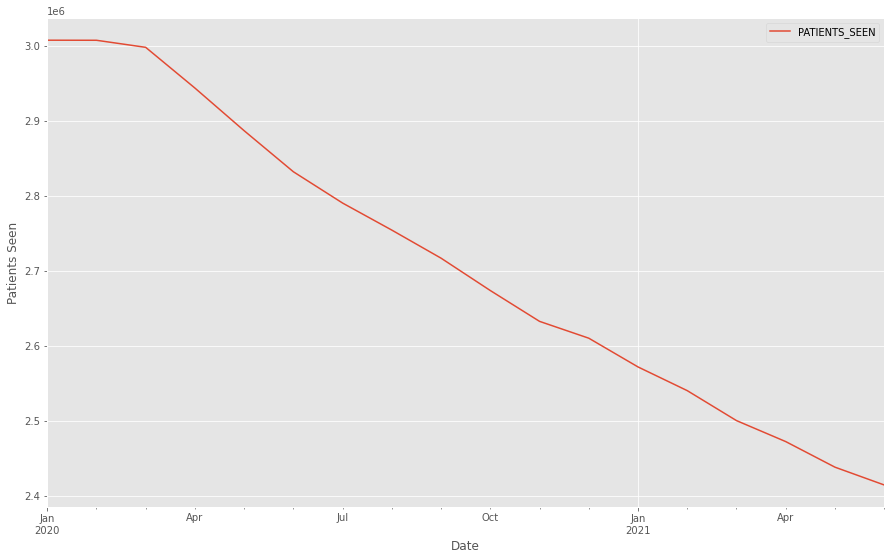

In [10]:
#a new dataframe created with only adults in london
dfadult = df3[(df3['PATIENT_TYPE'] == 'Adult')]
dflondon = dfadult[(dfadult['REGION_NAME'] == 'London')].dropna(subset = ['PRACTICE_CODE'])

#plot by date and remove uneeded column
dfdate = dflondon.groupby('PSEEN_END_DATE').sum()
dfplot = dfdate.drop(['POPULATION'],axis=1)
total_seen = dfplot.plot(kind = 'line',figsize=(15,9))
total_seen.set_xlabel('Date')
total_seen.set_ylabel('Patients Seen')





Here a line plot shows the total number of adult patients seen in London over the course of the pandemic.

Over the entire time period it is clearly visible that the number of adult patients seen monthly is stable until late March 2020, where it then steadily, linearly and continuously falls for the remaining period. The beginning of this fall coincides with the beginning of the national lockdown on the 23rd of March. When comparing this chart to the earlier COVID-19 data charts the decline in patients seen happens at around the time when admissions first start to increase and shortly before the recorded cases spike. There is a small window of an apparent return to normal when the first lockdown was lifted for around two months during mid October-December 2020 where the rate of decline slows. 

